# TikTok - Exploratory Data Analysis

This work continues the investigation started in the stage of the preliminary data summary, focusing on further analyzing the data and uncovering more details about the variables. The purpose is to carry out exploratory data analysis (EDA) on the dataset of TikTok videos. Professional data visualizations are created to tell a story and aid data-driven decision-making for business objectives.

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# reading the data
df = pd.read_csv("tiktok_dataset.csv")
df.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [76]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


The most useful visualizations for analyzing the data distribution are boxplots and histograms. These graphs help reveal the data's spread and can guide the next steps in the analysis. For instance, the way the data is distributed can influence which modeling approaches will be most effective.

Text(0.5, 1.0, 'View Count Boxplot')

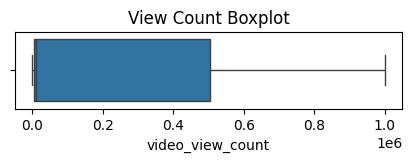

In [77]:
# creating boxplot for the number of views
plt.figure(figsize=(5, 1))
sns.boxplot(x=df["video_view_count"])
plt.title("View Count Boxplot")

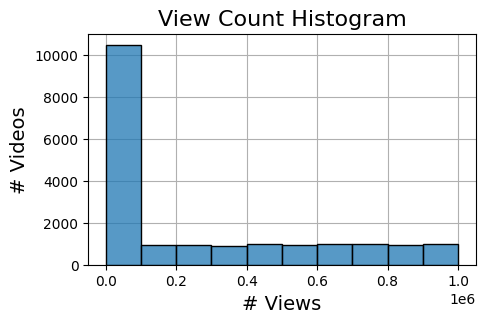

In [78]:
# creating histogram for the number of views
plt.figure(figsize=(5,3))
sns.histplot(df["video_view_count"], bins=range(0,(10**6+1),10**5), zorder=3)
plt.title("View Count Histogram", fontsize=16)
plt.xlabel("# Views", fontsize=14)
plt.ylabel("# Videos", fontsize=14)
plt.grid(zorder=0)

Text(0.5, 1.0, 'Like Count Boxplot')

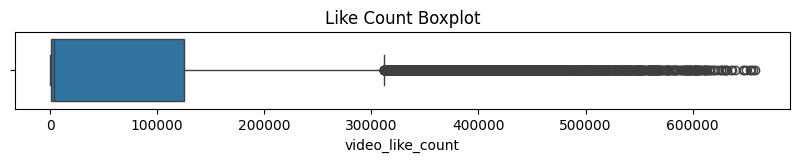

In [79]:
# creating boxplot for the number of likes
plt.figure(figsize=(10,1))
sns.boxplot(x=df["video_like_count"])
plt.title("Like Count Boxplot")

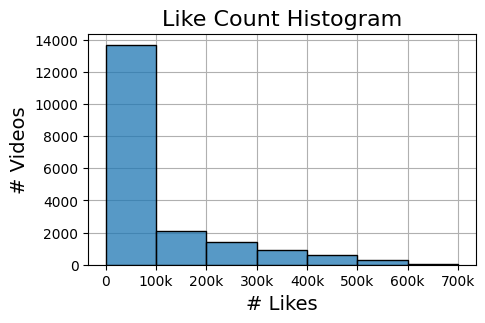

In [80]:
# creating histogram for the number of likes
plt.figure(figsize=(5,3))
ax = sns.histplot(df["video_like_count"], bins=range(0,(7*10**5+1), 10**5), zorder=3)
plt.title("Like Count Histogram", fontsize=16)
plt.xlabel("# Likes", fontsize=14)
plt.ylabel("# Videos", fontsize=14)
labels = [0] + [str(i) + "k" for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.grid(zorder=0)

Text(0.5, 1.0, 'Comment Count Boxplot')

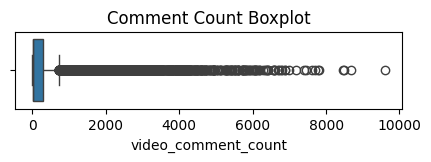

In [81]:
# creating boxplot for the number of comments
plt.figure(figsize=(5,1))
sns.boxplot(x=df["video_comment_count"])
plt.title("Comment Count Boxplot")

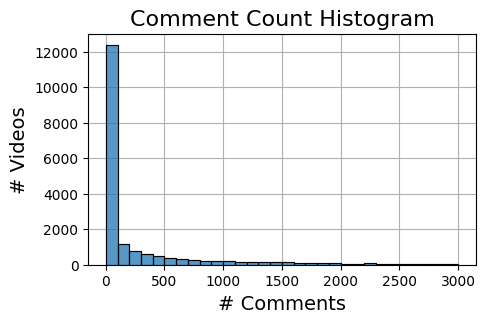

In [82]:
# creating histogram for the number of comments
plt.figure(figsize=(5,3))
sns.histplot(df["video_comment_count"], bins=range(0,(3001),100), zorder=3)
plt.title("Comment Count Histogram", fontsize=16)
plt.xlabel("# Comments", fontsize=14)
plt.ylabel("# Videos", fontsize=14)
plt.grid(zorder=0)

Text(0.5, 1.0, 'Share Count Boxplot')

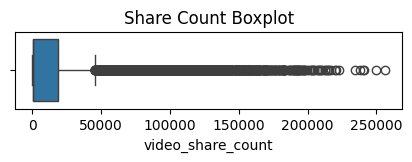

In [83]:
# creating boxplot for the number of shares
plt.figure(figsize=(5,1))
sns.boxplot(x=df["video_share_count"])
plt.title("Share Count Boxplot")

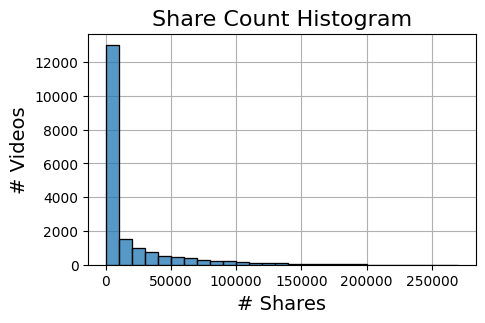

In [84]:
# creating histogram for the number of shares
plt.figure(figsize=(5,3))
sns.histplot(df["video_share_count"], bins=range(0,(270001),10000), zorder=3)
plt.title("Share Count Histogram", fontsize=16)
plt.xlabel("# Shares", fontsize=14)
plt.ylabel("# Videos", fontsize=14)
plt.grid(zorder=0)

Text(0.5, 1.0, 'Download Count Boxplot')

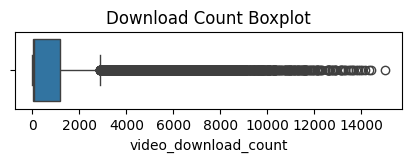

In [85]:
# creating boxplot for the number of downloads
plt.figure(figsize=(5,1))
sns.boxplot(x=df["video_download_count"])
plt.title("Download Count Boxplot")

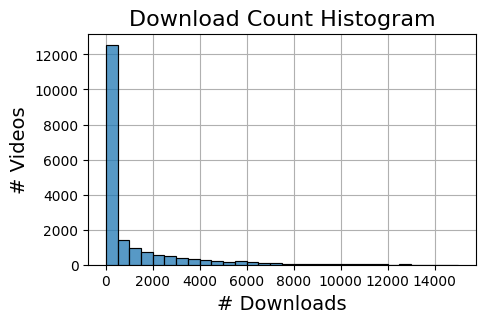

In [86]:
# creating histogram for the number of downloads
plt.figure(figsize=(5,3))
sns.histplot(df["video_download_count"], bins=range(0,(15001),500), zorder=3)
plt.title("Download Count Histogram", fontsize=16)
plt.xlabel("# Downloads", fontsize=14)
plt.ylabel("# Videos", fontsize=14)
plt.grid(zorder=0)

Text(0.5, 1.0, 'Duration Boxplot')

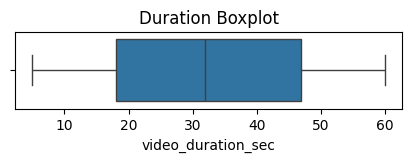

In [87]:
# creating boxplot for the video duration
plt.figure(figsize=(5,1))
sns.boxplot(x=df["video_duration_sec"])
plt.title("Duration Boxplot")

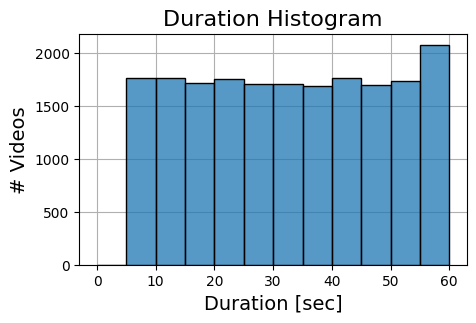

In [88]:
# creating histogram for the video duration
plt.figure(figsize=(5,3))
sns.histplot(df["video_duration_sec"], bins=range(0,61,5), zorder=3)
plt.title("Duration Histogram", fontsize=16)
plt.xlabel("Duration [sec]", fontsize=14)
plt.ylabel("# Videos", fontsize=14)
plt.grid(zorder=0)

All videos are between 5 and 60 seconds long, with an even distribution across this range. The distribution of view counts is uneven, with over half of the videos receiving fewer than 100,000 views. Videos with more than 100,000 views show a uniform distribution. Similar to views, there are significantly more videos with fewer than 100,000 likes, though the data shows a right-skew, with a few videos accumulating a very high number of likes. Most videos receive fewer than 100 comments and the distribution is heavily right-skewed. The majority of videos are shared fewer than 10,000 times, with a highly skewed distribution. Most videos are downloaded less than 500 times, but some have over 12,000 downloads, resulting in a right-skewed distribution.

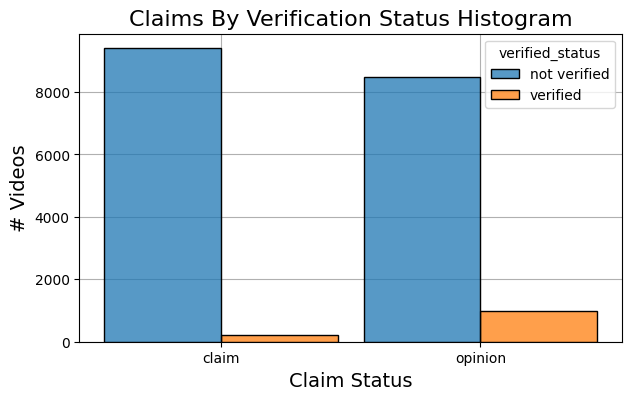

In [89]:
# creating histogram for the claim status by verification status
plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x="claim_status",
             hue="verified_status",
             multiple="dodge",
             shrink=0.9,
             zorder=3)
plt.title("Claims By Verification Status Histogram", fontsize=16)
plt.xlabel("Claim Status", fontsize=14)
plt.ylabel("# Videos", fontsize=14)
plt.grid(zorder=0)

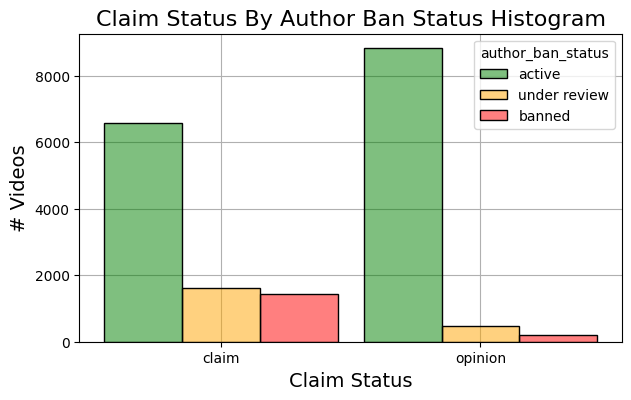

In [90]:
# creating histogram for the claim status by author ban status
fig = plt.figure(figsize=(7,4))
sns.histplot(df, x="claim_status",
             hue="author_ban_status",
             multiple="dodge",
             hue_order=["active", "under review", "banned"],
             shrink=0.9,
             palette={"active":"green", "under review":"orange", "banned":"red"},
             alpha=0.5,
             zorder=3)
plt.title("Claim Status By Author Ban Status Histogram", fontsize=16)
plt.xlabel("Claim Status", fontsize=14)
plt.ylabel("# Videos", fontsize=14)
plt.grid(zorder=0)

In [91]:
ban_status_counts = df.groupby(["author_ban_status"]).median(numeric_only=True).reset_index()

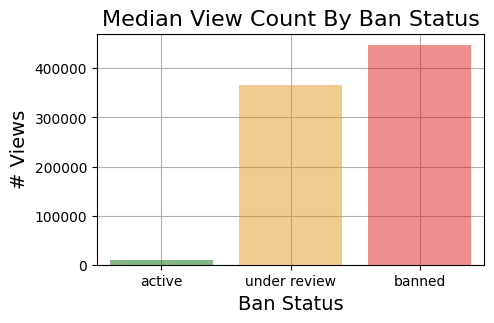

In [92]:
# creating barplot for median view count by ban status
fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x="author_ban_status",
            y="video_view_count",
            order=["active", "under review", "banned"],
            palette={"active":"green", "under review":"orange", "banned":"red"},
            alpha=0.5,
            zorder=3)
plt.title("Median View Count By Ban Status", fontsize=16)
plt.xlabel("Ban Status", fontsize=14)
plt.ylabel("# Views", fontsize=14)
plt.grid(zorder=0)

In [93]:
df.groupby("claim_status")["video_view_count"].median()

,video_view_count
claim_status,
claim,501555.0
opinion,4953.0


Text(0.5, 1.0, 'Total Views By Video Claim Status')

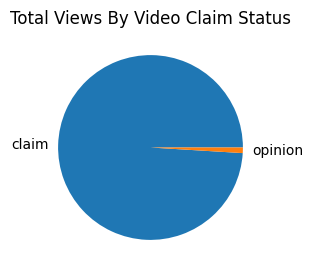

In [94]:
# creating pie chart for the total views by claim status
fig = plt.figure(figsize=(3,3))
plt.pie(df.groupby("claim_status")["video_view_count"].sum(), labels=["claim", "opinion"])
plt.title("Total Views By Video Claim Status")

In [95]:
count_cols = ["video_view_count",
              "video_like_count",
              "video_comment_count",
              "video_share_count",
              "video_download_count"]

for column in count_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr

    # counting the number of values that exceed the outlier threshold
    outlier_count = (df[column] > outlier_threshold).sum()
    print(f"Number of outliers for variable {column}:", outlier_count)

Number of outliers for variable video_view_count: 2343
Number of outliers for variable video_like_count: 3468
Number of outliers for variable video_comment_count: 3882
Number of outliers for variable video_share_count: 3732
Number of outliers for variable video_download_count: 3733


There are far fewer verified users compared to unverified users, but verified users tend to post opinion videos more often. For both claims and opinions, active authors are more common than banned authors or those under review. However, claim video authors are more likely to be under review or banned. The median view count for videos by non-active authors is much higher than for active authors. Since non-active authors tend to post claims more frequently and claim videos generally receive more views, video view count might be a good indicator of whether a video is a claim. Although claims and opinions are present in roughly equal numbers, the overall view count is dominated by claim videos, based on the graphs below.

In [96]:
opinion = df[df["claim_status"] == "opinion"]
claim = df[df["claim_status"] == "claim"]

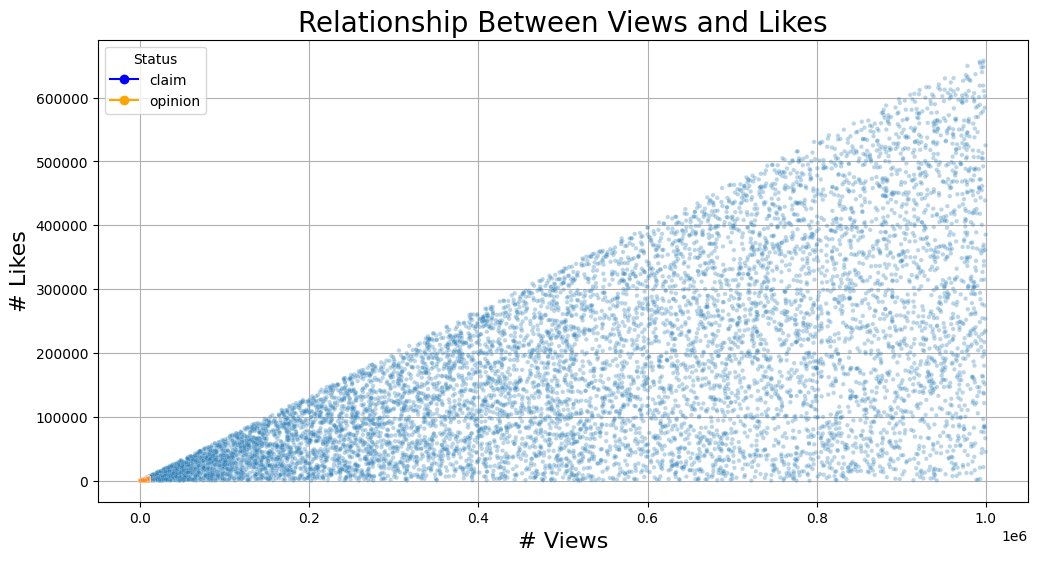

In [97]:
# creating scatterplot for the view count and like count according to the claim status
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["video_view_count"],
                y=df["video_like_count"],
                hue=df["claim_status"],
                s=10,
                alpha=.3,
                zorder=3)
handles = [ plt.Line2D([], [], marker="o", color="b", label="claim"),
            plt.Line2D([], [], marker="o", color="orange", label="opinion") ]
plt.legend(handles=handles, title="Status")
plt.title("Relationship Between Views and Likes", fontsize=20)
plt.xlabel("# Views", fontsize=16)
plt.ylabel("# Likes", fontsize=16)
plt.grid(zorder=0)

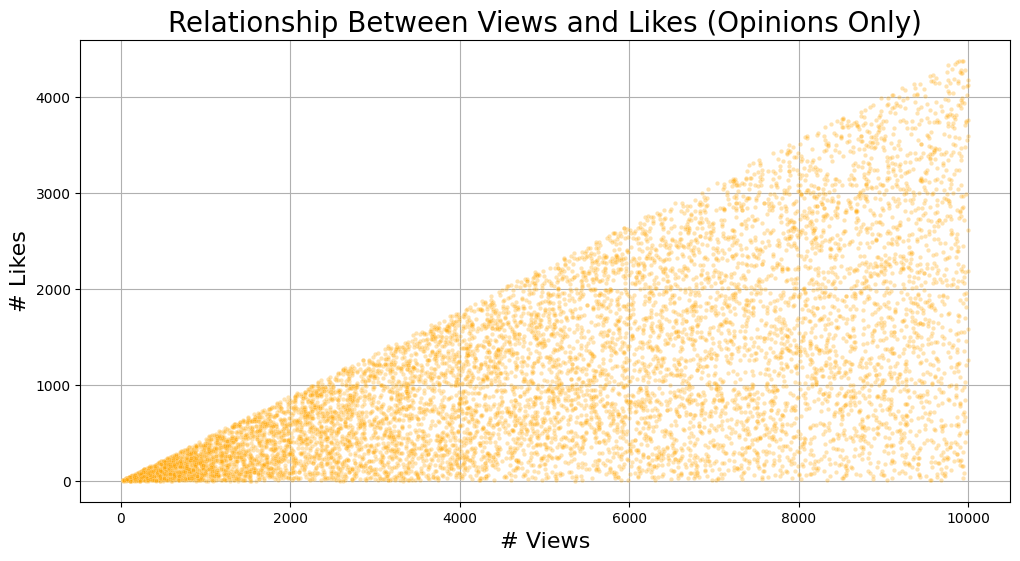

In [98]:
# creating scatterplot for the view count and like count only for opinions
plt.figure(figsize=(12,6))
sns.scatterplot(x=opinion["video_view_count"],
                y=opinion["video_like_count"],
                s=10,
                alpha=.3,
                color="orange",
                zorder=3)
plt.title("Relationship Between Views and Likes (Opinions Only)", fontsize=20)
plt.xlabel("# Views", fontsize=16)
plt.ylabel("# Likes", fontsize=16)
plt.grid(zorder=0)

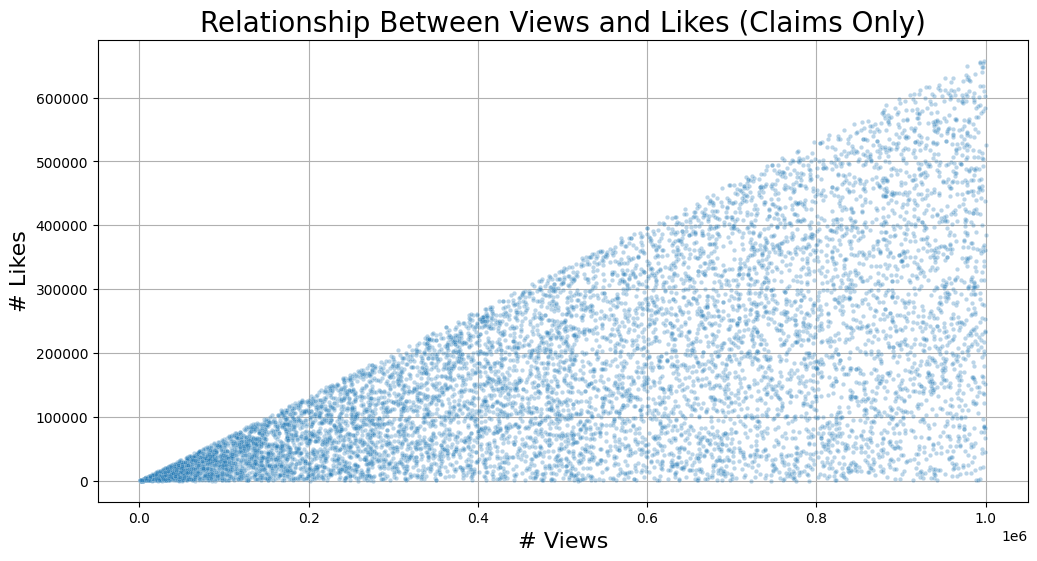

In [99]:
# creating scatterplot for the view count and like count only for claims
plt.figure(figsize=(12,6))
sns.scatterplot(x=claim["video_view_count"],
                y=claim["video_like_count"],
                s=10,
                alpha=.3,
                zorder=3)
plt.title("Relationship Between Views and Likes (Claims Only)", fontsize=20)
plt.xlabel("# Views", fontsize=16)
plt.ylabel("# Likes", fontsize=16)
plt.grid(zorder=0)

Through our analysis, the spread and distribution of the data were examined, including count frequencies, mean and median values, outliers and missing data. We also looked at correlations between variables, particularly the relationship between claim status and other factors. We want to further investigate the distinct characteristics that are unique to claims or opinions. EDA is essential because it helps data professionals familiarize themselves with the data, identify outliers, clean missing values and prepare the data for modeling. Finally, visualizations helped us understand that this dataset contains outliers and decisions will need to be made about how to handle them before modeling.